# CSE 555 - Introduction to pattern recognition
## Problem Set 3: Exact Inference with Probabilistic Graphical Models




## Problem 1

### Draw the moral graph, triangulated graph and the junction tree. Explain why the "running intersection property" is satisfied in your junction tree.

In [124]:
import pgmpy.models

chest_clinic_bayesian_model = pgmpy.models.BayesianModel([('asia','tub'),('smoke','lung'),('smoke','bronc'),
                       ('tub','either'),('lung','either'),('either','xray'),
                       ('bronc','dysp'),('either','dysp')])
# chest_clinic_bayesian_model.add_edges_from([('asia', 'tub'),('tub', 'either'),('either', 'xray'),('either', 'dysp'),('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp')])

In [125]:
import pgmpy.factors.discrete


asia_cpd = pgmpy.factors.discrete.TabularCPD('asia', 2, [[0.01], [0.99]])
tub_cpd = pgmpy.factors.discrete.TabularCPD('tub', 2, [[0.05, 0.01], [0.95, 0.99]], ['asia'], [2])
smoke_cpd = pgmpy.factors.discrete.TabularCPD('smoke', 2, [[0.5], [0.5]])
lung_cpd = pgmpy.factors.discrete.TabularCPD('lung', 2, [[0.1, 0.01], [0.9, 0.99]], ['smoke'], [2])
bronc_cpd = pgmpy.factors.discrete.TabularCPD('bronc', 2, [[0.6, 0.3], [0.4, 0.7]], ['smoke'], [2])
either_cpd = pgmpy.factors.discrete.TabularCPD('either', 2, [[1, 1, 1, 0], [0, 0, 0, 1]], ['lung', 'tub'], [2, 2])
xray_cpd = pgmpy.factors.discrete.TabularCPD('xray', 2, [[0.98, 0.05], [0.02, 0.95]], ['either'], [2])
dysp_cpd = pgmpy.factors.discrete.TabularCPD('dysp', 2, [[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]], ['bronc', 'either'], [2, 2])

chest_clinic_bayesian_model.add_cpds(asia_cpd, tub_cpd, smoke_cpd, lung_cpd, bronc_cpd, either_cpd, xray_cpd, dysp_cpd)

#### Moralization of graphical model

A moral graph of a directed acyclic graph G is an undirected graph in which each node of the original G is now connected to its Markov blanket.

Hence the model is converted to a Markov network to make in undirected.

In [109]:
chest_clinic_markov_model = chest_clinic_bayesian_model.to_markov_model()

Moral graph:


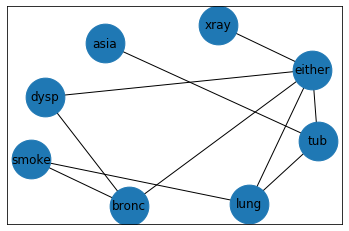

In [110]:
import networkx as nx

print('Moral graph:')
nx.draw_networkx(chest_clinic_markov_model, with_labels=True, node_size=1500)

#### Triangulation of graphical model


Triangulated graph:


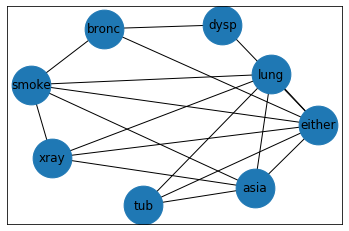

In [111]:
triangulated_model = chest_clinic_markov_model.triangulate()

print('Triangulated graph:')
nx.draw_networkx(triangulated_model, with_labels=True, node_size=1500)

#### Junction tree from graphical model

Junction tree from Bayesian model:


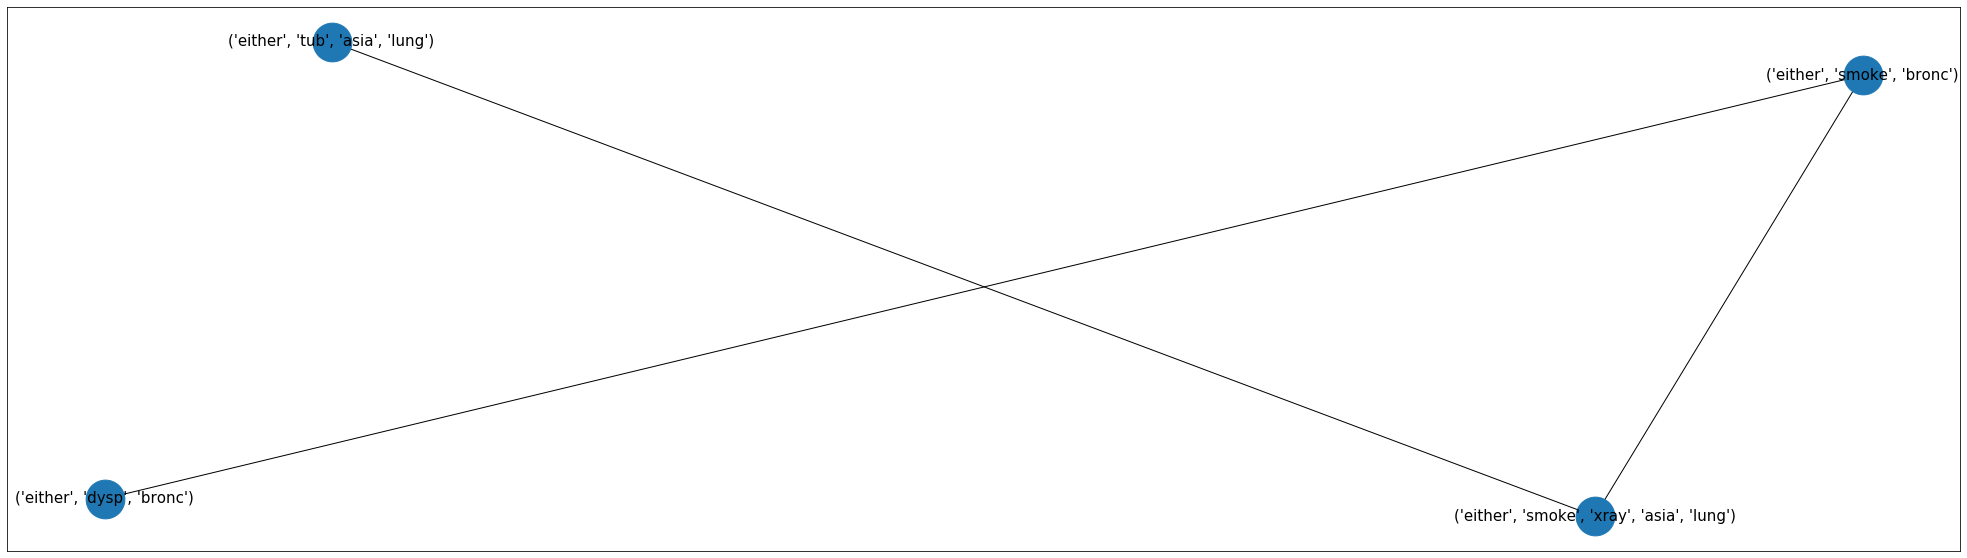

In [138]:
import matplotlib.pyplot as plt

print('Junction tree from Bayesian model:')
junction_tree_bayesian_model = chest_clinic_bayesian_model.to_junction_tree()
plt.figure(1, figsize=(35, 10))
nx.draw_networkx(junction_tree_bayesian_model, nx.spring_layout(junction_tree_bayesian_model), with_labels=True, node_size=1500, font_size=15)
plt.show()

Junction tree from Markov network:


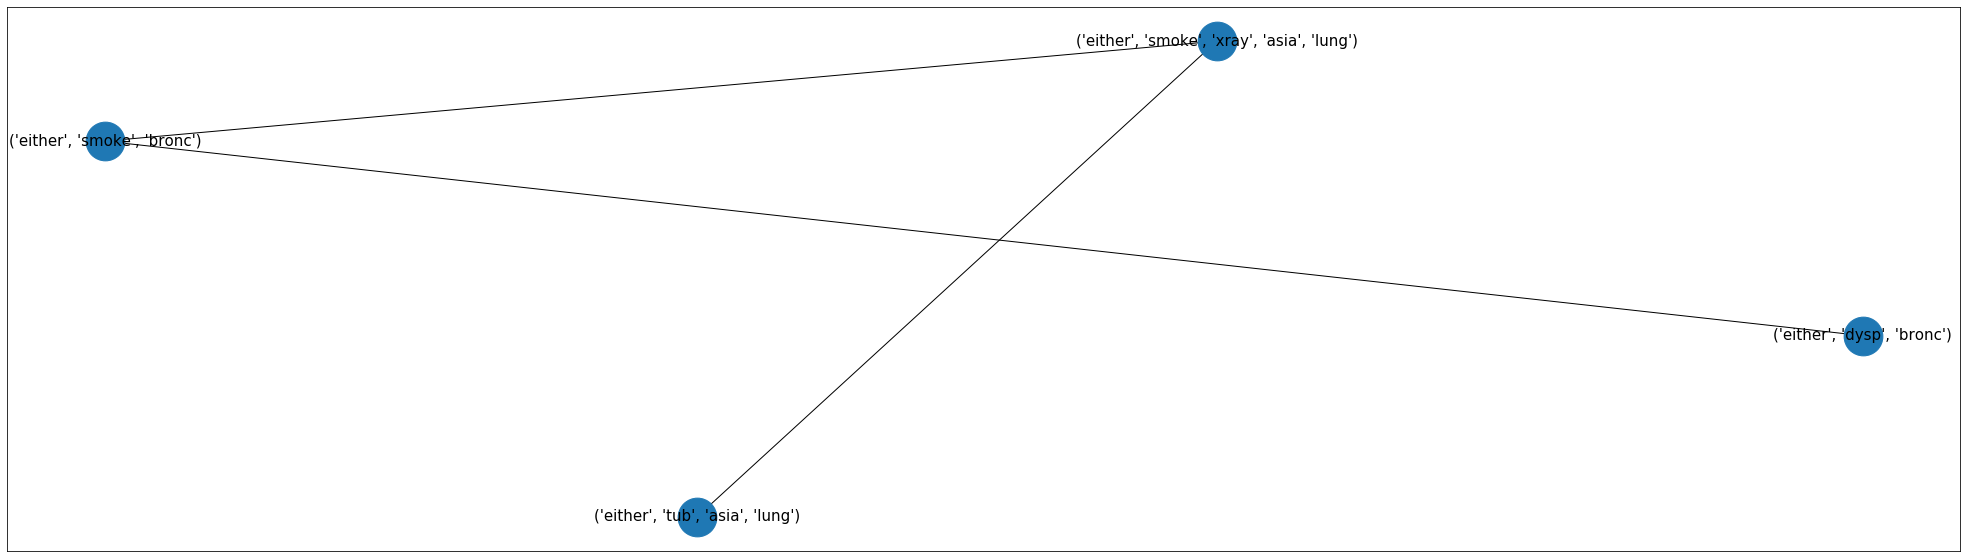

In [118]:
import matplotlib.pyplot as plt

print('Junction tree from Markov network:')
juntion_tree_markov_model = chest_clinic_markov_model.to_junction_tree()
plt.figure(1, figsize=(35, 10))
nx.draw_networkx(juntion_tree_markov_model, with_labels=True, node_size=1500, font_size=15)
plt.show()

#### The running intersection property is satisfied in the junction tree since for each X ∈ Ci and X ∈ Cj, X is also in every cluster in the (unique) path in junction tree between Ci and Cj. (For example it can be verified with 'either' as a test case.) All intermediate nodes that appear are passed along as a message. Hence the running intersection property is satisfied in the above junction tree

### Use message-passing algorithm to find the joint probability of "tub=yes, lung=yes, bronc=yes", given evidence that "asia=yes, xray=yes". 

In [129]:
from pgmpy.inference.ExactInference import BeliefPropagation

belief_propagation = BeliefPropagation(chest_clinic_bayesian_model)
joint_probability = belief_propagation.query(variables=['tub', 'lung', 'bronc'], evidence={'asia':0, 'xray':0}, joint=False, show_progress=False)

In [131]:
print(joint_probability['tub'])
print(joint_probability['lung'])
print(joint_probability['bronc'])

+--------+------------+
| tub    |   phi(tub) |
+========+============+
| tub(0) |     0.3377 |
+--------+------------+
| tub(1) |     0.6623 |
+--------+------------+
+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.3715 |
+---------+-------------+
| lung(1) |      0.6285 |
+---------+-------------+
+----------+--------------+
| bronc    |   phi(bronc) |
+==========+==============+
| bronc(0) |       0.4911 |
+----------+--------------+
| bronc(1) |       0.5089 |
+----------+--------------+


In [132]:
from pgmpy.inference.ExactInference import BeliefPropagation

belief_propagation = BeliefPropagation(chest_clinic_bayesian_model)
joint_probability = belief_propagation.query(variables=['tub', 'lung', 'bronc'], evidence={'asia':1, 'xray':1}, joint=False, show_progress=False)

In [145]:
print(joint_probability['tub'])
print(joint_probability['lung'])
print(joint_probability['bronc'])
print(joint_probability['tub']*joint_probability['lung']*joint_probability['bronc'])

print("Hence the required joint probability is (tub(1), lung(1), bronc(1)) -> 0.5562")

+--------+------------+
| tub    |   phi(tub) |
+========+============+
| tub(0) |     0.0002 |
+--------+------------+
| tub(1) |     0.9998 |
+--------+------------+
+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0012 |
+---------+-------------+
| lung(1) |      0.9988 |
+---------+-------------+
+----------+--------------+
| bronc    |   phi(bronc) |
+==========+==============+
| bronc(0) |       0.4430 |
+----------+--------------+
| bronc(1) |       0.5570 |
+----------+--------------+
+--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0000 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0000 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.0001 |
+-----

## Problem 2

### Describe how the different terms on the right hand side of "p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)" are distributed among the different juction tree clusters. Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals.

From the junction tree above, these are the clusters:

Node 1: Dysp, bronc, either <br>
Node 2: Either, smoke, bronc <br>
Node 3: Either, smoke, xray, asia, lung <br>
Node 4: Either, tub, asia, lung <br>

Since node 4 is a leaf node we can pass the message from the node 4 to node 3. As it can be seen that asia is a common data, we will sum it over asia (A).


\begin{equation*}
\psi ( D,\ B,\ E) \ =\ p( d|e,\ b)
\end{equation*}


\begin{equation*}
\psi ( S,\ B,\ E) \ =\ p( b|s)
\end{equation*}


\begin{equation*}
\psi ( S,\ X,\ T,\ E,\ L) \ =\ p( x|e) \ p( e|t,\ l) \ p( l|s)
\end{equation*}


\begin{equation*}
\psi ( S,\ X,\ T,\ A) \ =\ \psi ( S,\ T,\ A) \ =\ p( a) \ p( t|a) \ p( s)
\end{equation*}


#### Iteration 1:
Message is sent from node 4 to node 3.


\begin{equation*}
\sum _{a} \psi ( S,\ T,\ A) \ =\ \sum _{s} p( a) \ p( t|a) \ p( s)
\end{equation*}

S, T -> Yes or No

$\displaystyle \psi ( S,\ X,\ T,\ E,\ L)$ at Node 3 ->


\begin{equation*}
\psi ( S,\ X,\ T,\ E,\ L)' \ =\psi ( S,\ X,\ T,\ E,\ L)\sum _{a} \psi ( S,\ T,\ A)
\end{equation*}


Also,

\begin{equation*}
\frac{\psi ( S,\ T,\ A)}{\sum _{a} \psi ( S,\ T,\ A)} \ =\ p( a) \ p( t|a) \ p( s)
\end{equation*}

Therefore, 


\begin{equation*}
\psi ( D,\ B,\ E) \ \psi ( S,\ B,\ E) \ \psi ( S,\ X,\ T,\ E,\ L)\sum _{a} \psi ( S,\ T,\ A) \ =\ P( A,\ T,\ X,\ D,\ B,\ L,\ S)
\end{equation*}


\begin{equation*}
\sum _{a} \psi ( D,\ B,\ E) \ \psi ( S,\ B,\ R) \ \psi ( S,\ X,\ T,\ E,\ L) \ \psi ( S,\ T,\ A) \ =\ P( A,\ T,\ X,\ D,\ B,\ L,\ S)
\end{equation*}


#### Iteration 2:
In this iteration, the message is sent from Node 3 to node 2.


\begin{equation*}
\sum _{b} \psi ( S,\ X,\ T,\ E,\ L)' \ =\ \sum _{b} p( x|e) \ p( e|t,\ l) \ p( l|s) \ \psi ( S,\ T,\ A)
\end{equation*}

Since $\sum _{b} p( x|e) \ p( e|t,\ l) \ p( l|s) \ \psi ( S,\ T,\ A)$ is 1 ->
$\displaystyle \frac{\psi ( S,\ X,\ T,\ E,\ L)'}{\sum _{b} \psi ( S,\ X,\ T,\ E,\ L)'} \ =$ Conditional probability

On simplification,
$\displaystyle \psi ( S,\ B,\ E) \ \psi ( S,\ X,\ T,\ E,\ L)' \ =\ $ Marginal probability


#### Iteration 3:
In this iteration, message is sent from node 2 to 1

#### Iteration 4:
In this iteration, message is sent from node 1 to 2

#### Iteration 5:
In this iteration, message is sent from node 2 to 3

#### Iteration 6:
In this iteration, message is sent from node 3 to 4


### At the end of message passing we will have the marginals